In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.utils import to_categorical
import tensorflow.keras.datasets as datasets
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, Reshape, Activation, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import KFold, train_test_split

In [2]:
# np_load_old = np.load
# # modify the default parameters of np.load
# np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# (train_data, train_targets), (test_data, test_targets) = datasets.boston_housing.load_data()
# print(type(train_data), train_data.shape)
# print(type(train_targets), train_targets.shape)

# # restore np.load for future normal usage
# np.load = np_load_old

dataset_pd = pd.read_csv("cars.csv", delimiter=",")
dataset = dataset_pd.values.astype(np.float64)
print(dataset.shape)

(963, 6)


In [3]:
mean = dataset.mean(axis=0)
dataset -= mean
std = dataset.std(axis=0)
dataset /= std

In [4]:
x_train = dataset[:,0:5]
y_train = dataset[:,5]
print(x_train.shape, y_train.shape)

(963, 5) (963,)


In [5]:
print(x_train[0], y_train[0])

[-0.81175459 -1.02630644 -0.35180374 -0.77249454 -0.63733127] -1.2324179325602829


In [15]:
def make_model():
    model = Sequential([Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
                        Dropout(0.5),
                        Dense(64, activation='relu'),
                        Dense(64, activation='relu'),
    #                     Dense(128, activation='relu'),
    #                     Dropout(0.5),
    #                     Dense(128, activation='relu'),
                        Dense(1)])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model
    
# model.summary()

In [16]:
# skfolds = KFold(n_splits=3, random_state=42)

In [25]:
# fold = 0
for fold in range(1):
# train_index, val_index in skfolds.split(x_train, y_train):
#     print('Fold-'.format(fold+1))
    model = make_model()
    
    x, x_val, y, y_val = train_test_split(x_train, y_train, test_size=0.33)
    
#     print(x.shape, y.shape, x_val.shape, y_val.shape)
    
#     x = x_train[train_index]
#     y = y_train[train_index]
    
#     x_val = x_train[val_index]
#     y_val = y_train[val_index]
    
    history = model.fit(x, y, epochs=500, batch_size=1, validation_data=(x_val, y_val), verbose=2)


Train on 645 samples, validate on 318 samples
Epoch 1/500
645/645 - 2s - loss: 0.2951 - mean_absolute_error: 0.4284 - val_loss: 0.1847 - val_mean_absolute_error: 0.3273
Epoch 2/500
645/645 - 2s - loss: 0.2436 - mean_absolute_error: 0.3882 - val_loss: 0.1639 - val_mean_absolute_error: 0.3105
Epoch 3/500
645/645 - 2s - loss: 0.1981 - mean_absolute_error: 0.3417 - val_loss: 0.2434 - val_mean_absolute_error: 0.3733
Epoch 4/500
645/645 - 2s - loss: 0.1961 - mean_absolute_error: 0.3403 - val_loss: 0.1712 - val_mean_absolute_error: 0.3234
Epoch 5/500
645/645 - 2s - loss: 0.1890 - mean_absolute_error: 0.3351 - val_loss: 0.1590 - val_mean_absolute_error: 0.3141
Epoch 6/500
645/645 - 2s - loss: 0.1769 - mean_absolute_error: 0.3212 - val_loss: 0.1737 - val_mean_absolute_error: 0.3352
Epoch 7/500
645/645 - 2s - loss: 0.1812 - mean_absolute_error: 0.3246 - val_loss: 0.1584 - val_mean_absolute_error: 0.3120
Epoch 8/500
645/645 - 2s - loss: 0.1742 - mean_absolute_error: 0.3146 - val_loss: 0.1582 - va

In [26]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
# train_acc = history.history['mae']
# test_acc = history.history['val_mae']

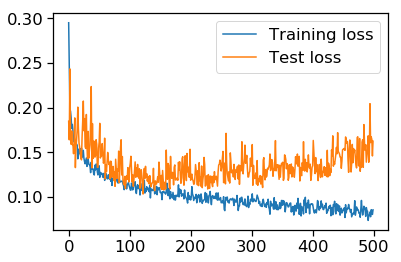

In [27]:
plt.plot(list(range(len(train_loss))), train_loss, label='Training loss')
plt.plot(list(range(len(test_loss))), test_loss, label='Test loss')
plt.legend()

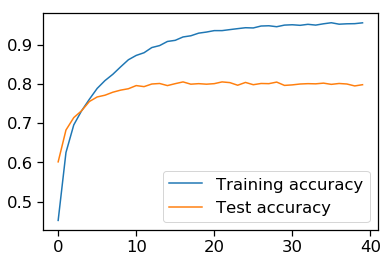

In [30]:
# plt.plot(list(range(len(train_loss))), train_acc, label='Training accuracy')
# plt.plot(list(range(len(test_loss))), test_acc, label='Test accuracy')
# plt.legend()